# Notebook for the cell-cell interaction research of fetal stem cells with neuronal cells using liana package
- **Developed by:** Anna Maguza
- **Place:** Wuerzburg Institute for System Immunology
- **Date:** 20th November 2023

### Import required modules

In [34]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import liana as li
import anndata as ad

### Set up working environment

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                         10.1.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.13.1
brotli                      1.1.0
certifi                     2023.11.17
cffi                        1.16.0
charset_normalizer          3.3.2
comm                        0.1.4
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
docrep                      0.3.2
exceptiongroup              1.1.3
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
get_annotations             NA
h5py                        3.10.0
idna                        3.4
importlib_resources         NA
ipykernel                   6.26.0
isodurati

In [4]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

### Data Upload

In [5]:
input_path = '/home/amaguza/data/Processed_data/Gut_data/Fetal_stem_cells/FetalSC_and_other_fetal_cells/FetalSC_and_myeloid_cells_raw.h5ad'
adata = sc.read_h5ad(input_path)

In [6]:
# Extract the raw counts
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 14997 × 26442
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels'
    var: 'feature_types-0-0-0', 'gene_name-1-0-0', 'gene_id-0-0', 'GENE-1-0'

In [7]:
X_is_raw(adata)

True

In [8]:
# Save raw counts in raw
adata.raw = adata

### Preprocess data

In [9]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after = 1e6)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


### Liana Run

In [10]:
# import all individual methods
import liana 
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

In [27]:
# Run rank_aggregate
li.mt.rank_aggregate(adata, groupby='Cell States', expr_prop=0, verbose=True)

Using `.raw`!
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
2965 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/pandas/core/indexing.py:1819: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/_pipe_utils/_pre.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The following cell identities were excluded: MMP9+ Inflammatory macrophage
Using resource `consensus`.
0.10 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 14993 samples and 23477 features
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:246: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:343: RuntimeWarning: overflow encountered in power
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract


Assuming that counts were `natural` log-normalized!


/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.

Running CellPhoneDB


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.51it/s]


Running Connectome
Running log2FC


/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce


Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:37<00:00,  4.59it/s]


In [28]:
adata.uns['liana_res'].head()

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
236744,FXYD3+_CKB+_SC,Lymphoid DC,APP,CD74,89.579361,0.000,420.899353,1.385967,NaN,0.076848,0.984459,0.000018,0.0,NaN,1.487704e-10
228630,ASS1+_SLC40A1+_SC,Lymphoid DC,APP,CD74,88.986763,0.001,211.384109,0.922793,NaN,0.038595,0.978209,0.000008,0.0,NaN,1.713396e-10
269200,RPS10+_RPS17+_SC,Lymphoid DC,APP,CD74,88.935303,0.001,193.189362,0.882569,NaN,0.035273,0.977229,0.000008,0.0,NaN,1.755182e-10
376403,Megakaryocyte,Macrophages,PF4,LDLR,118.282043,0.000,91.048920,4.938045,inf,0.101736,0.967172,0.000002,0.0,NaN,1.860503e-10
146128,Megakaryocyte,FXYD3+_CKB+_SC,PF4,LRP1,118.284866,0.000,92.382790,4.967444,inf,0.166690,0.967402,0.000002,0.0,NaN,1.860503e-10


In [13]:
#Write anndata object to file
adata.write('/home/amaguza/data/Processed_data/Gut_data/Fetal_stem_cells/FetalSC_and_other_fetal_cells/FetalSC_and_myeloid_liana_aggregated.h5ad')

In [29]:
adata.obs['Cell States'].value_counts()

Cell States
ASS1+_SLC40A1+_SC                3979
RPS10+_RPS17+_SC                 3544
Macrophages                      3105
LYVE1+ Macrophage                1757
cDC2                             1232
Monocytes                         439
FXYD3+_CKB+_SC                    294
cDC1                              210
CLC+ Mast cell                    121
MPO+ mono-neutrophil              114
pDC                               102
Megakaryocyte                      56
Mast cell                          31
Lymphoid DC                         9
MMP9+ Inflammatory macrophage       4
Name: count, dtype: int64

In [20]:
# Extract all values from neuronal.obs['Cell States'] into list
cell_states = []
for i in adata.obs['Cell States']:
    cell_states.append(i)


# Conver cell_states to a list
cell_states = list(cell_states)

# Delete 'MMP9+ Inflammatory macrophage' from cell_states
cell_states.remove('MMP9+ Inflammatory macrophage')
cell_states.remove('MMP9+ Inflammatory macrophage')
cell_states.remove('MMP9+ Inflammatory macrophage')
cell_states.remove('MMP9+ Inflammatory macrophage')

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 140 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


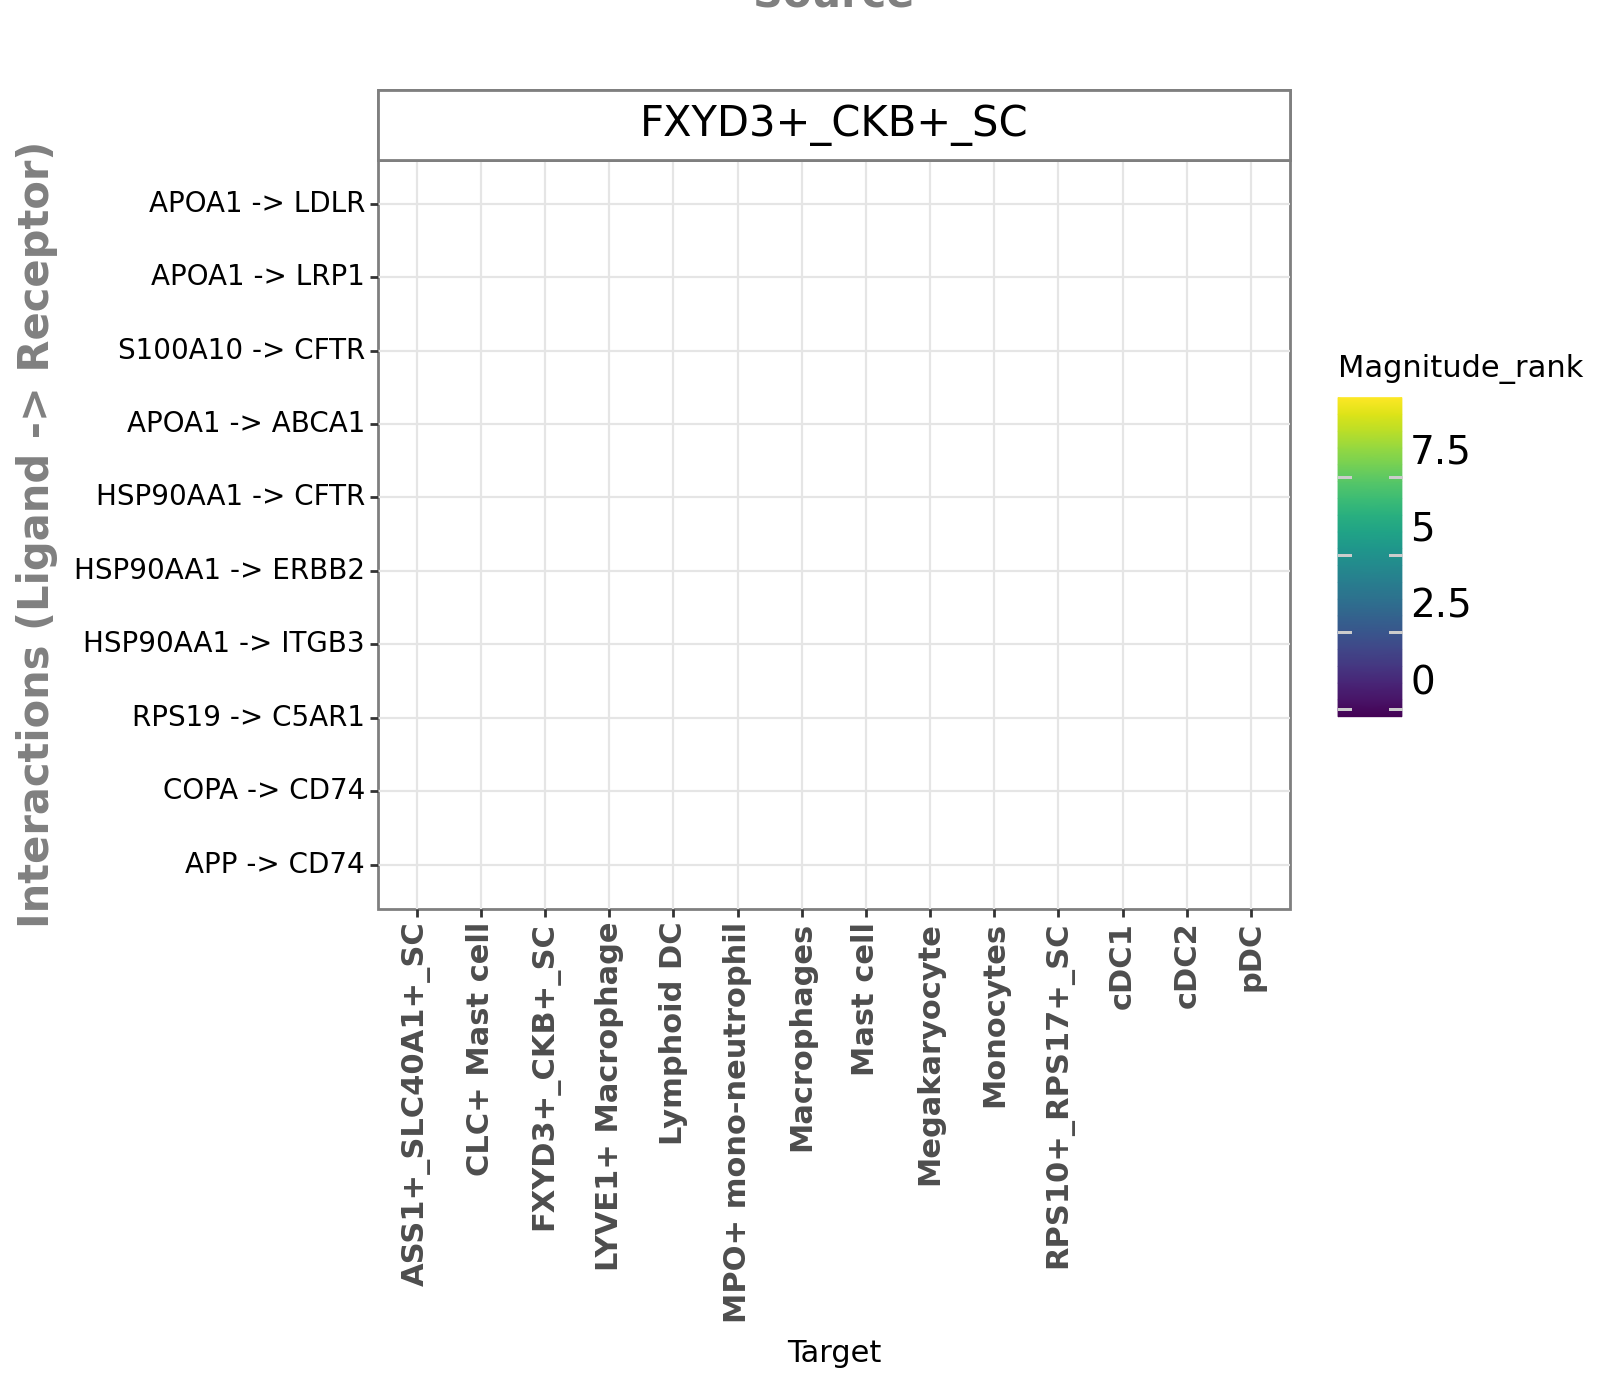

<Figure Size: (800 x 700)>

In [30]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['FXYD3+_CKB+_SC'],
              target_labels=cell_states,
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 140 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


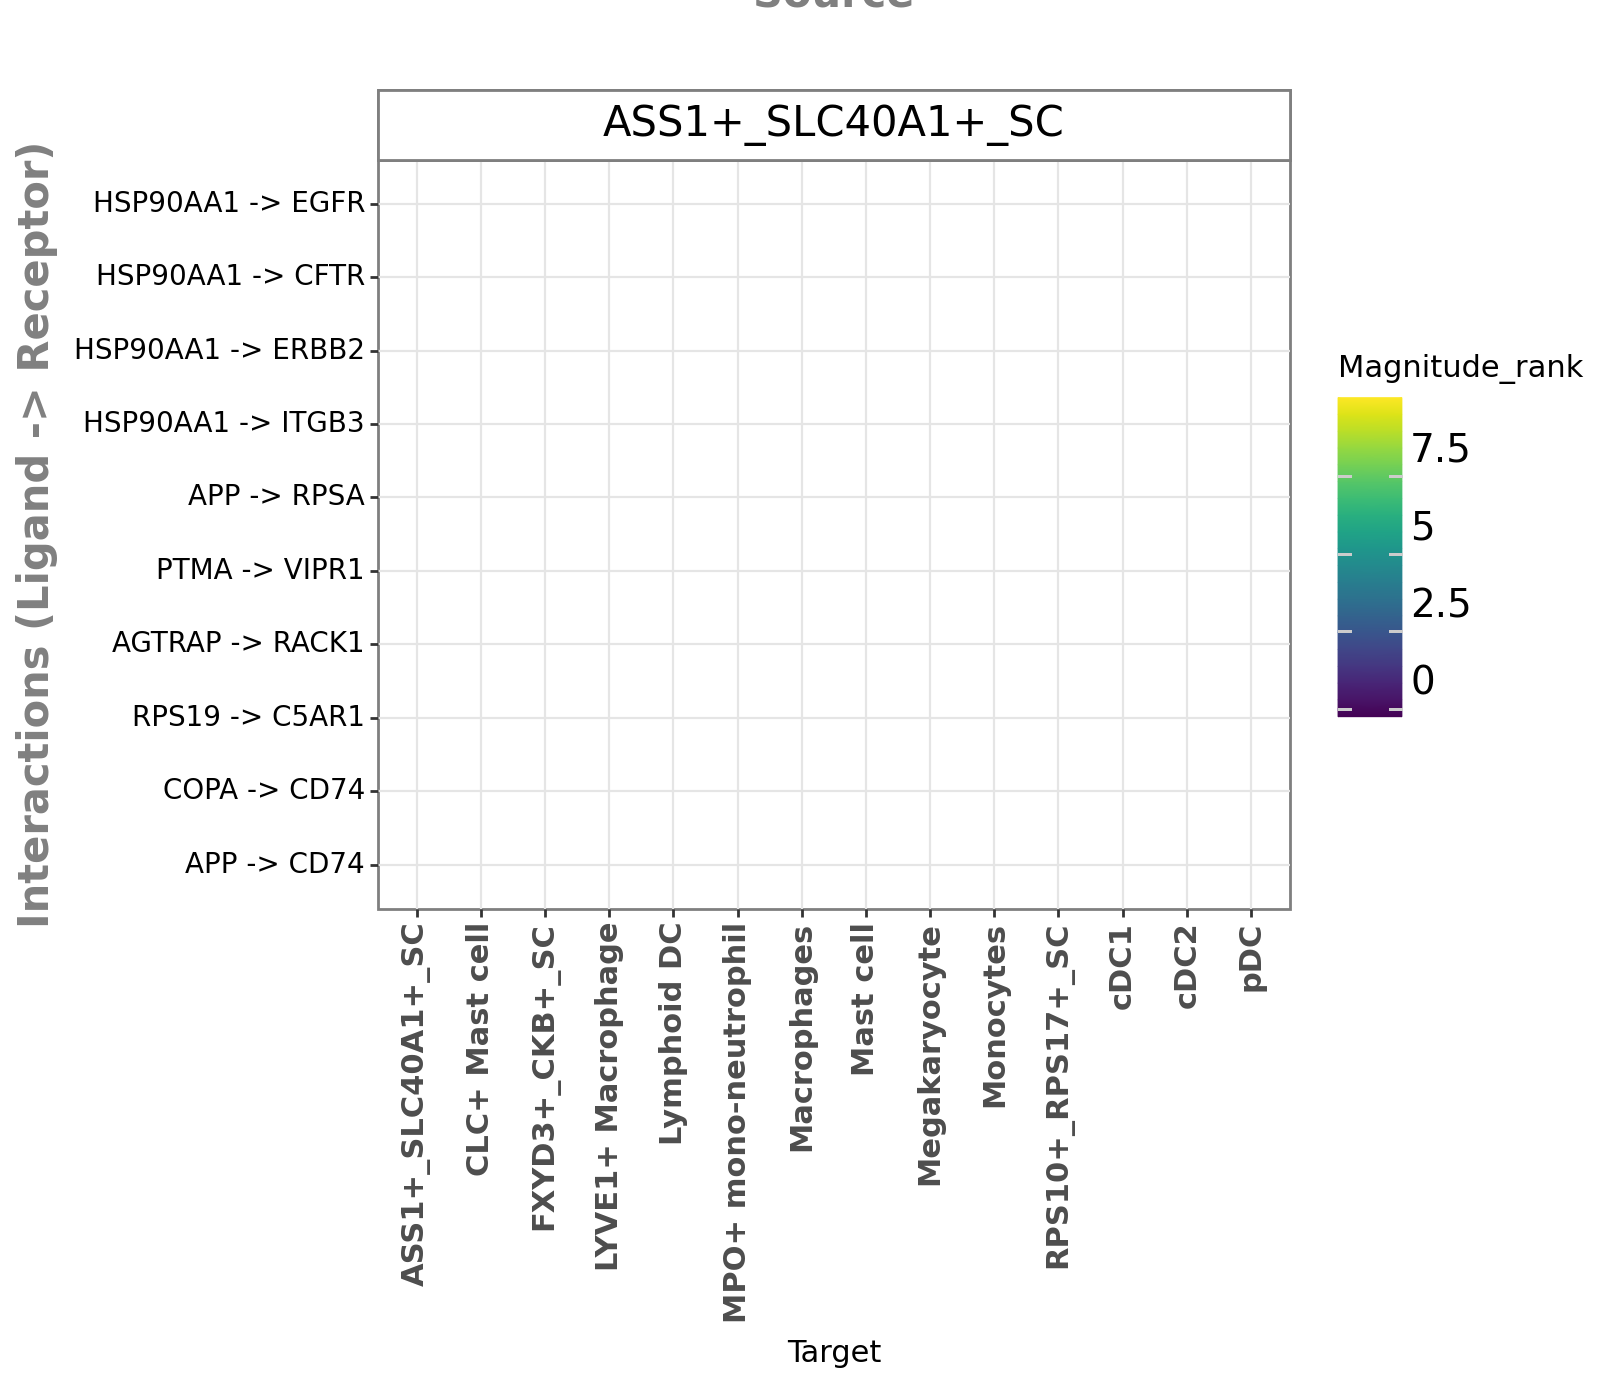

<Figure Size: (800 x 700)>

In [31]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['ASS1+_SLC40A1+_SC'],
              target_labels=cell_states,
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 140 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


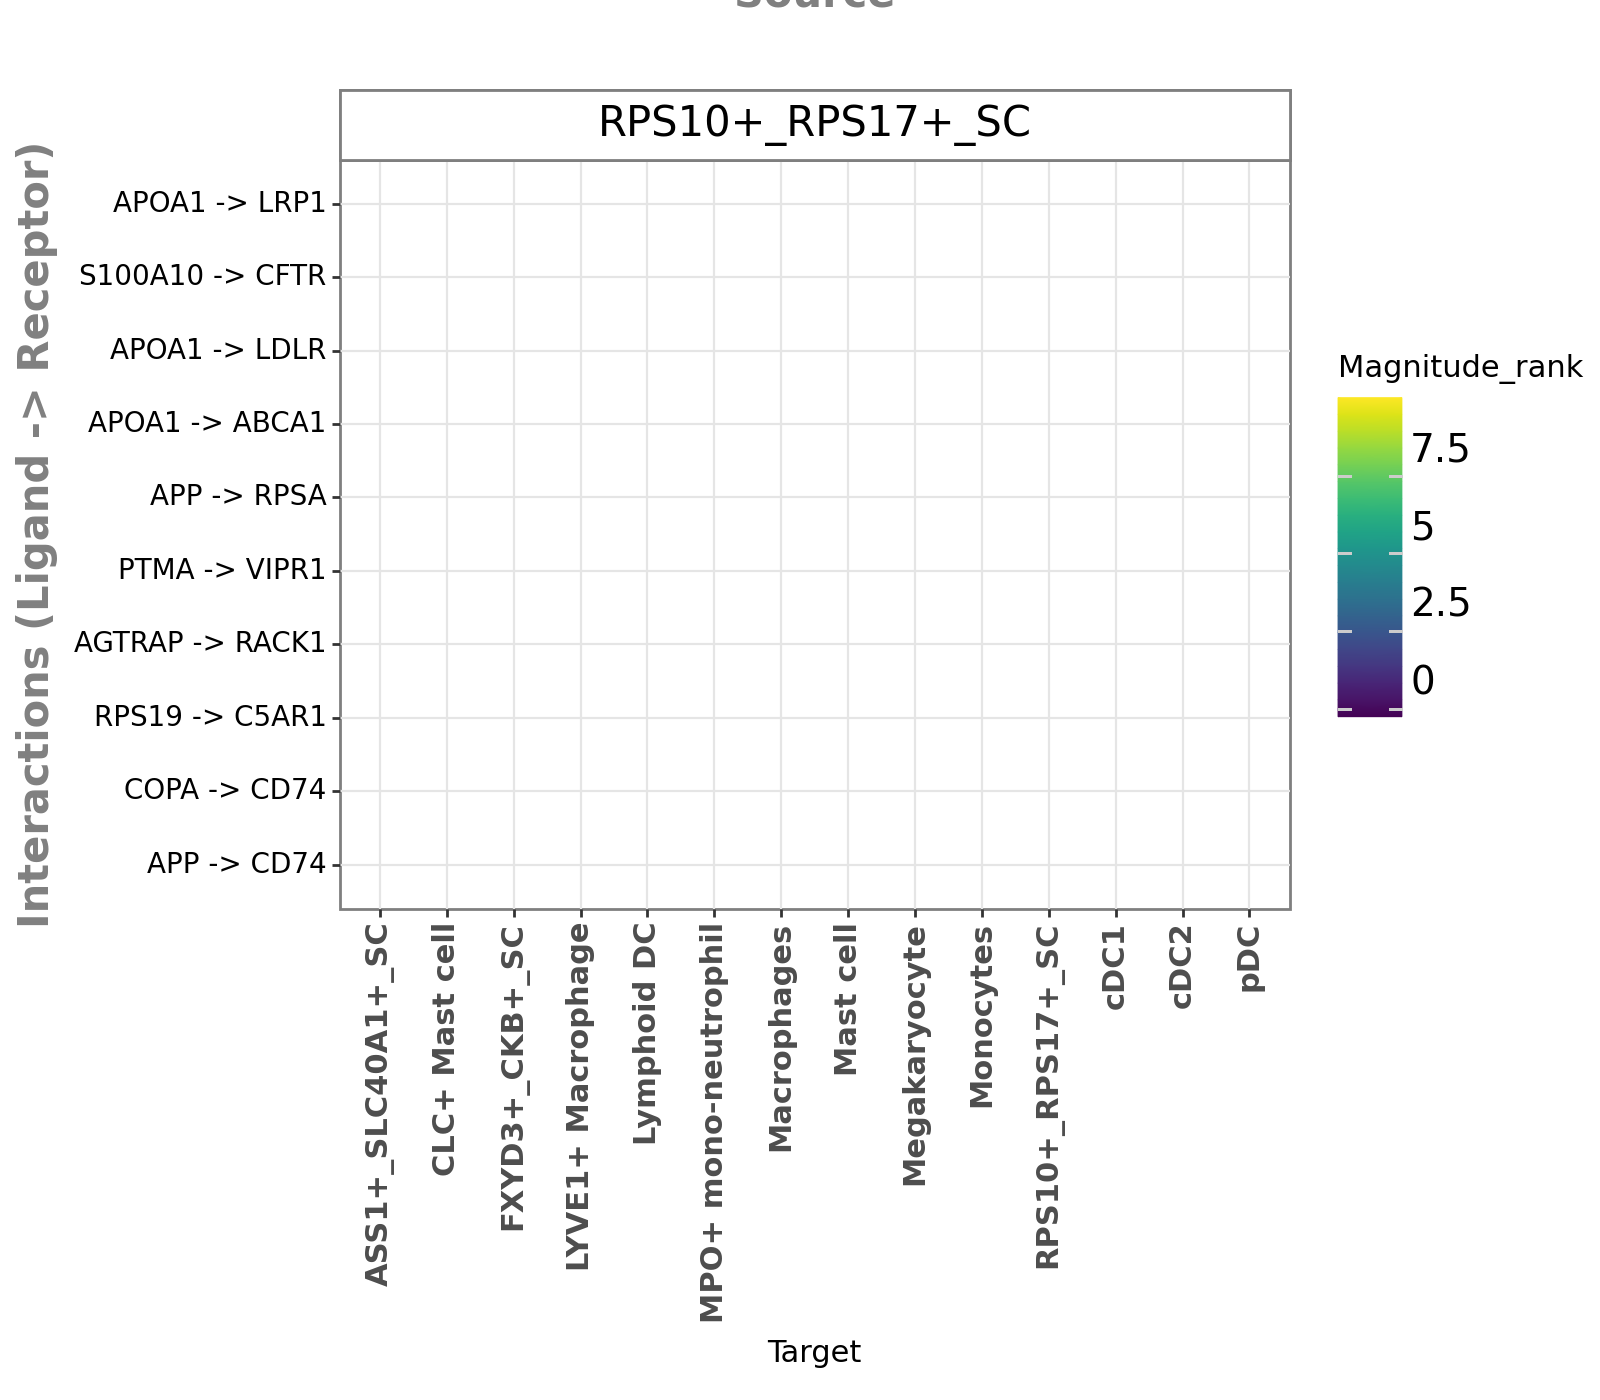

<Figure Size: (800 x 700)>

In [32]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['RPS10+_RPS17+_SC'],
              target_labels=cell_states,
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 140 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


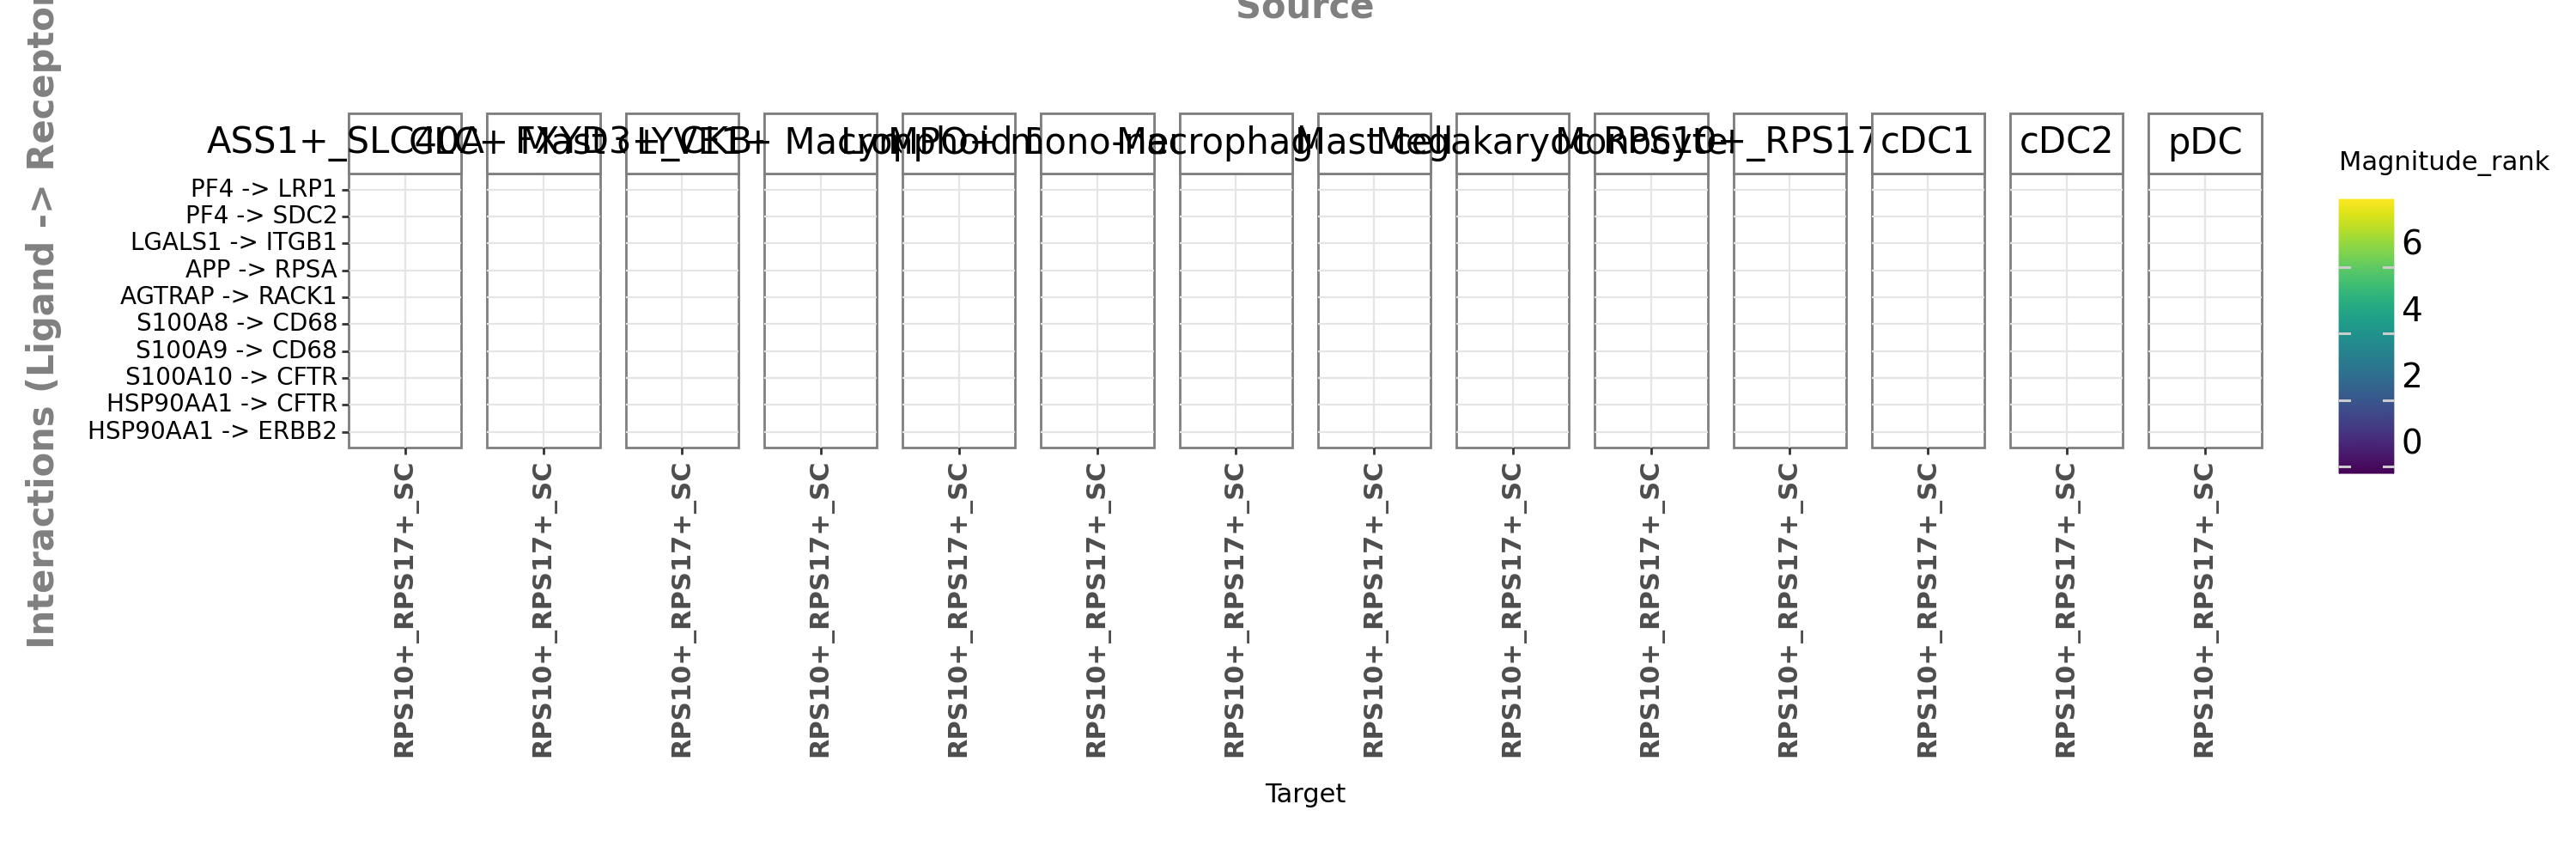

<Figure Size: (1500 x 500)>

In [35]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=cell_states,
              target_labels=['RPS10+_RPS17+_SC'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 5)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 140 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


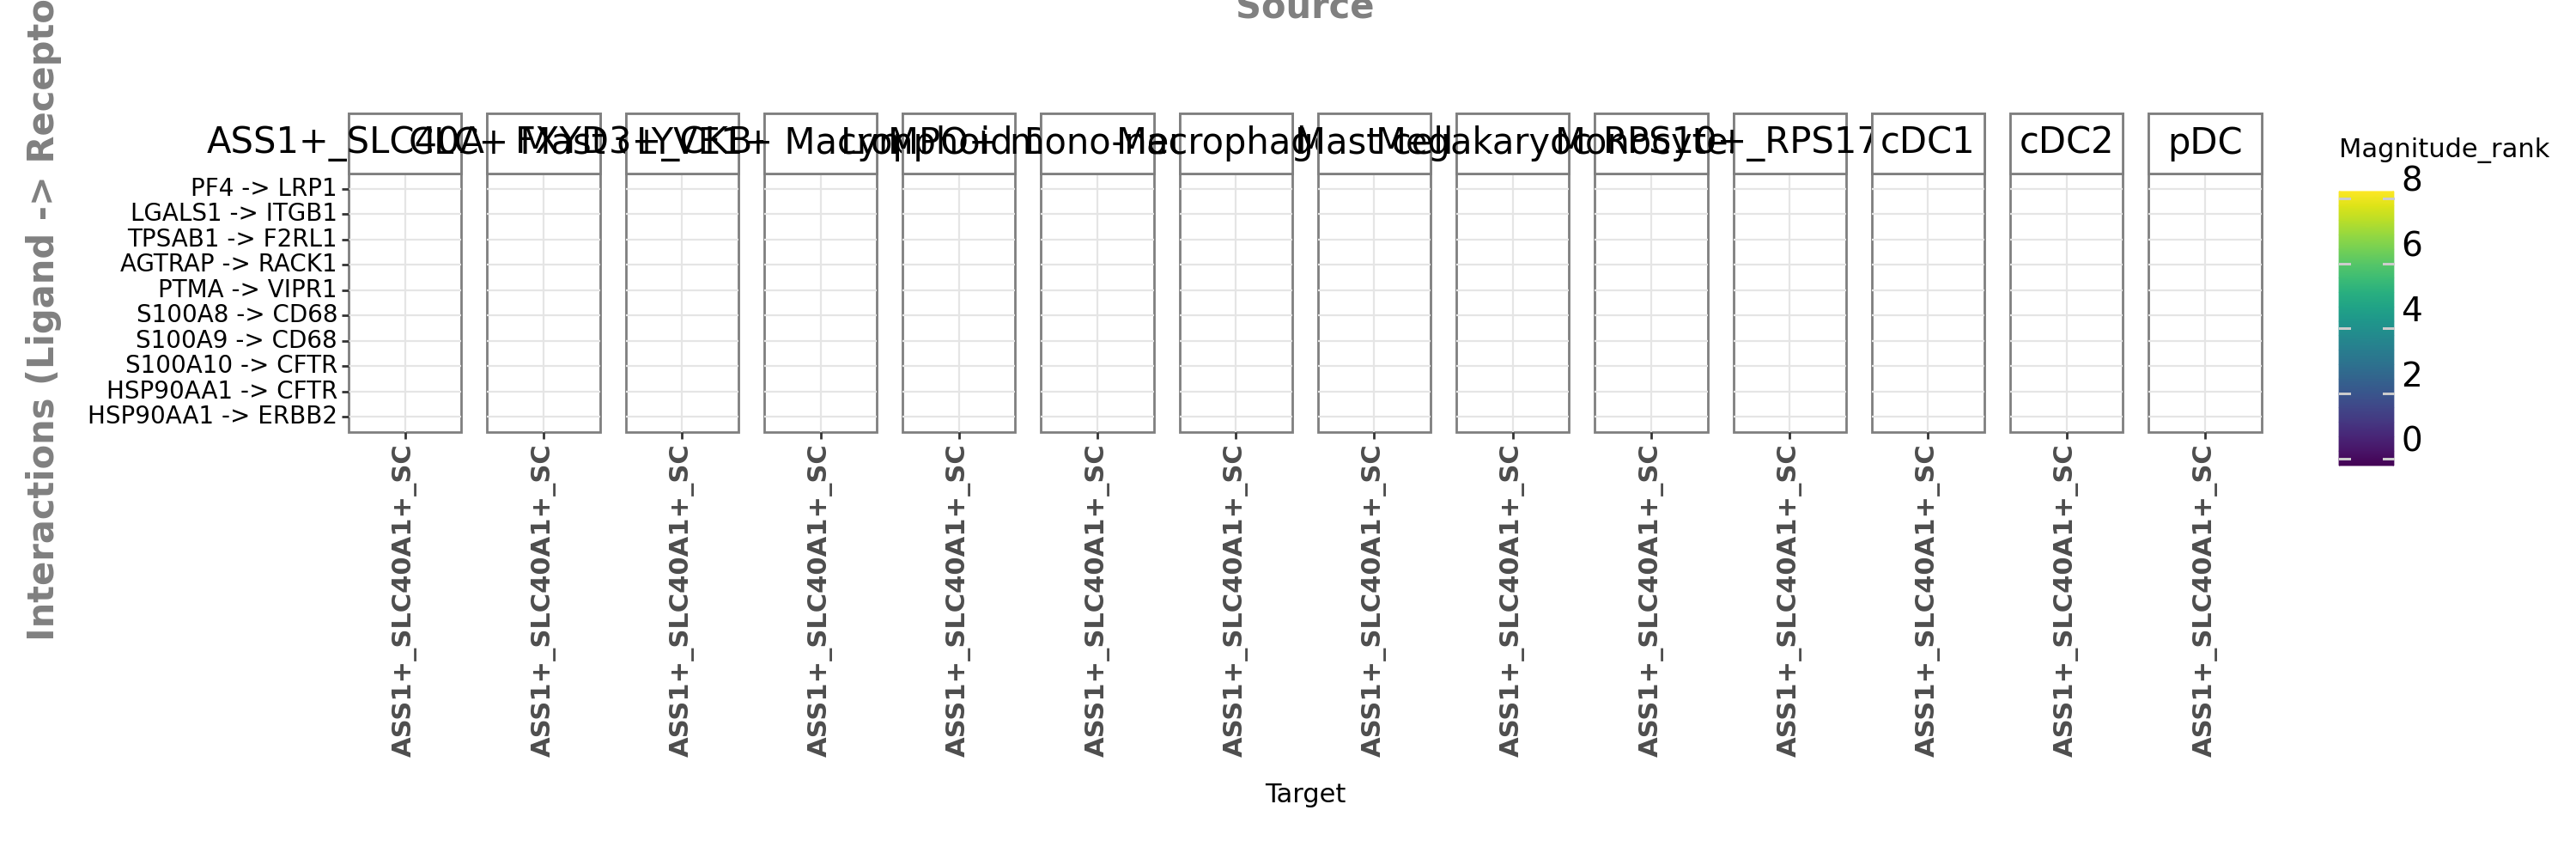

<Figure Size: (1500 x 500)>

In [36]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=cell_states,
              target_labels=['ASS1+_SLC40A1+_SC'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 5)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 140 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


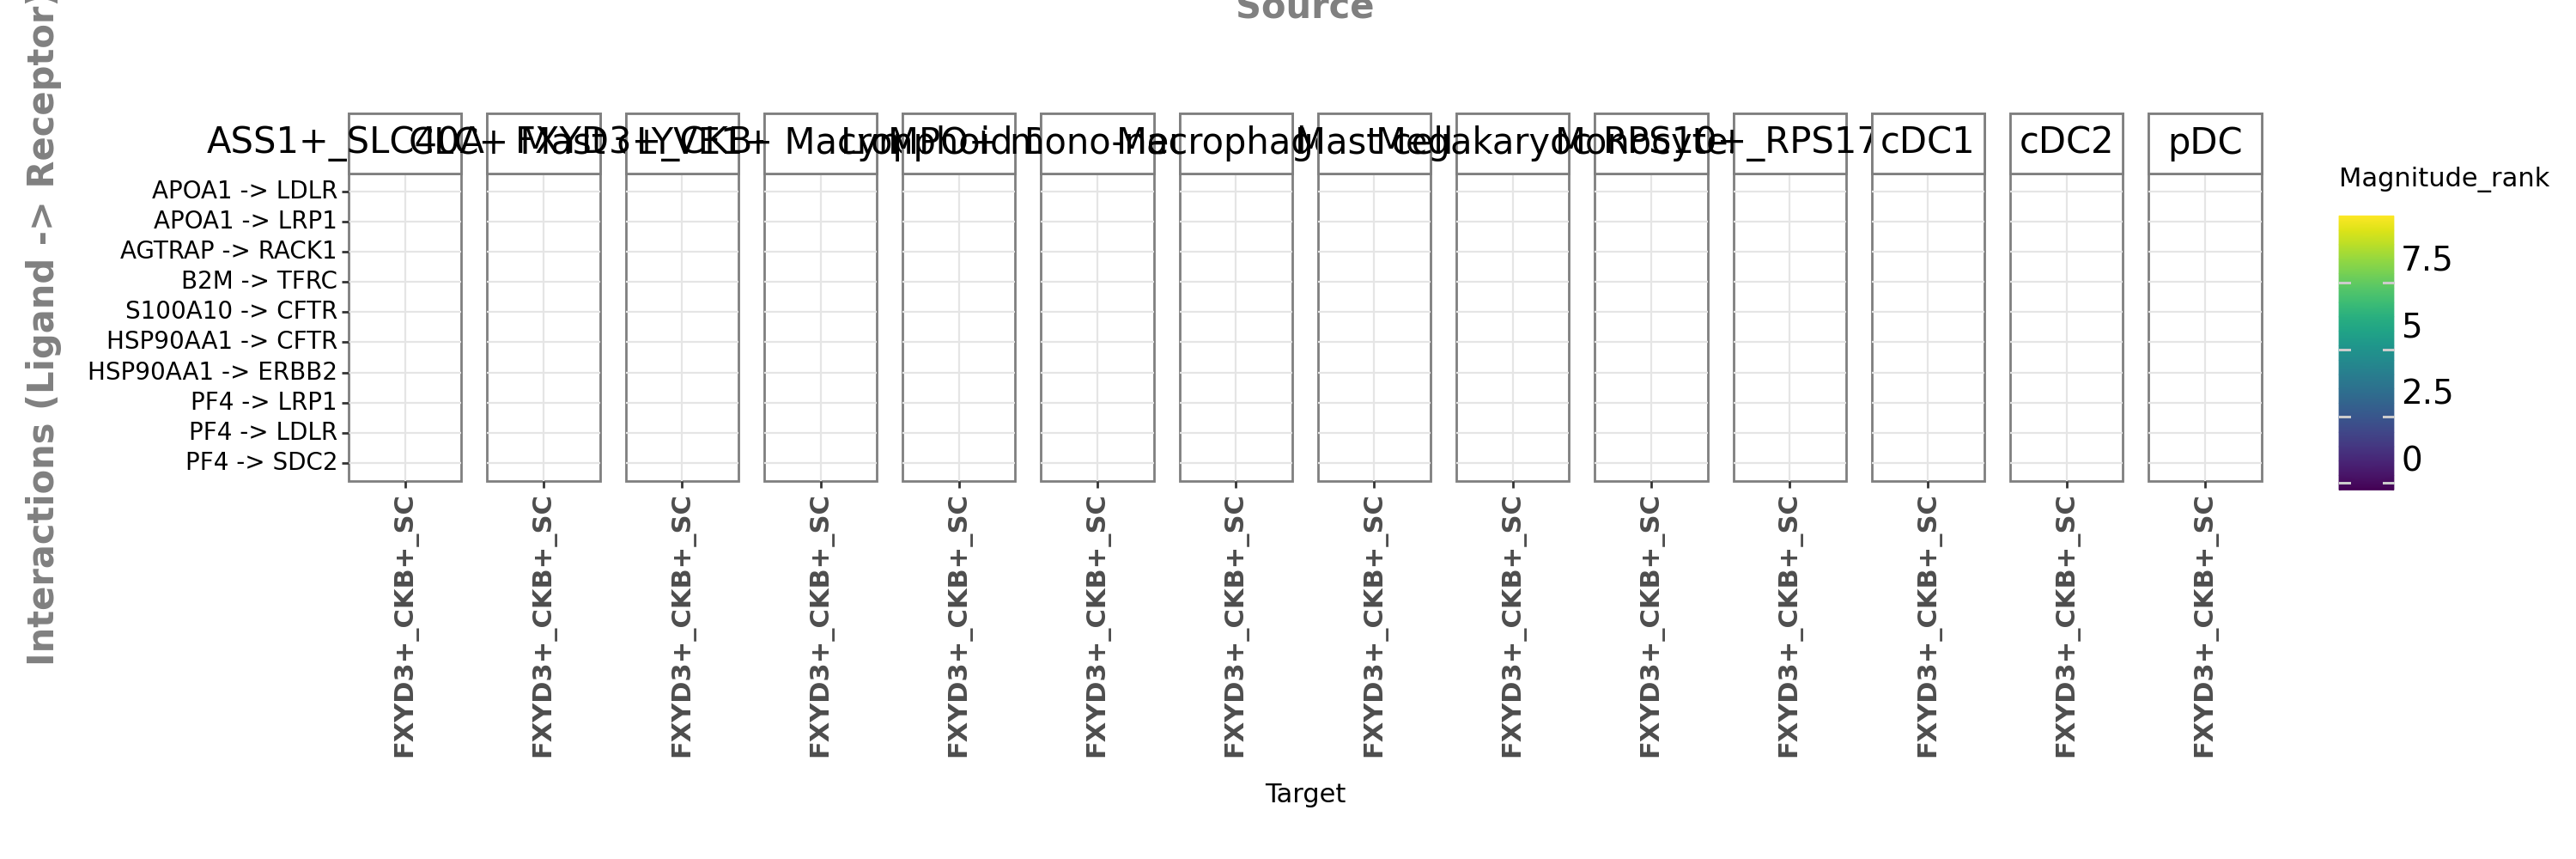

<Figure Size: (1500 x 500)>

In [37]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=cell_states,
              target_labels=['FXYD3+_CKB+_SC'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 5)
             )